In [1]:
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('housing.csv')
df.head()    

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

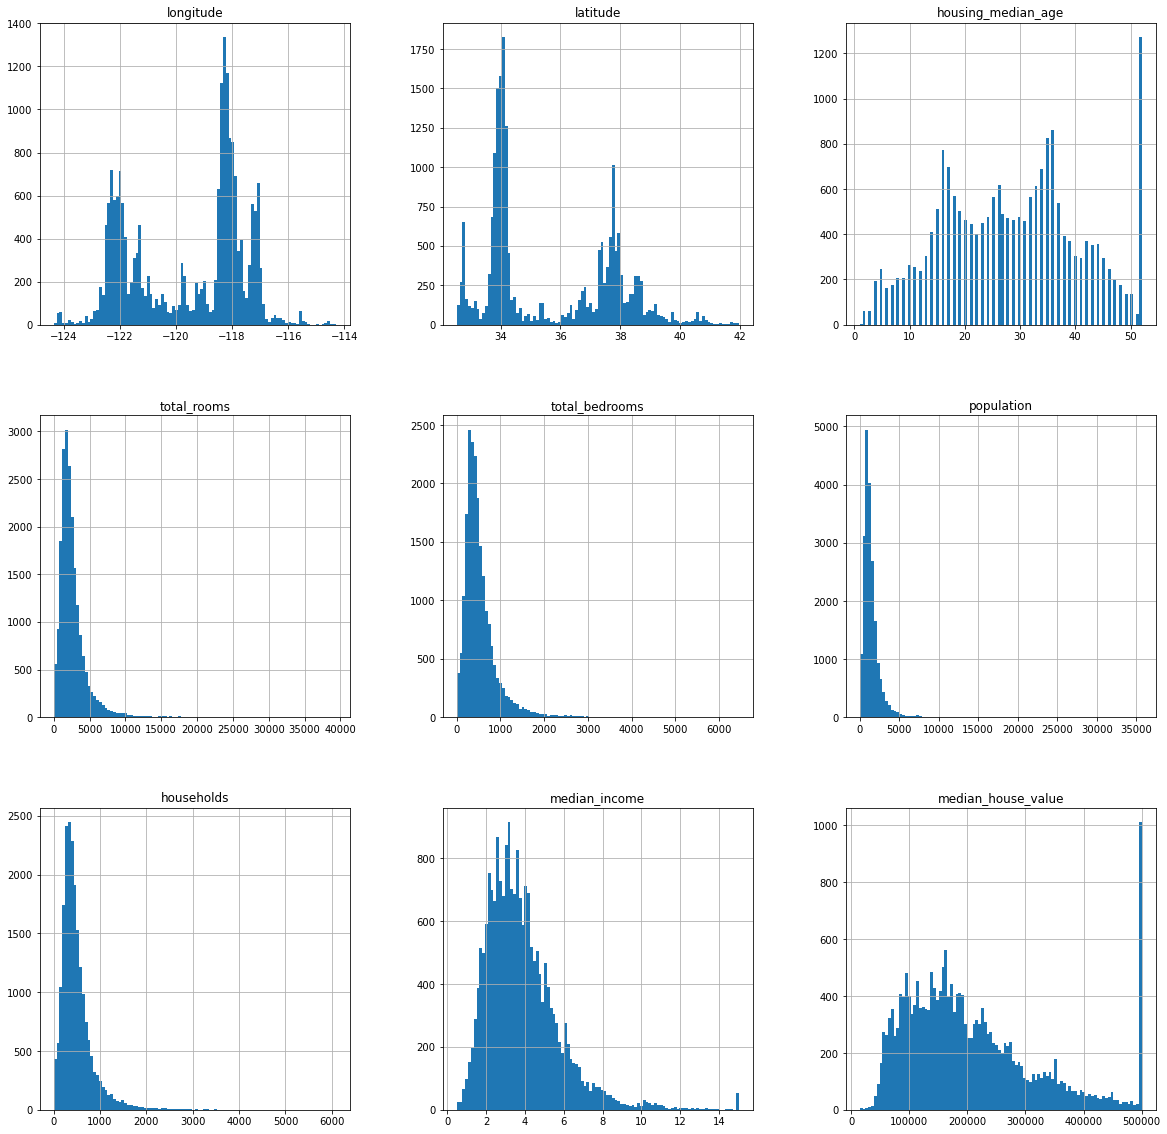

In [5]:
df.hist(bins=100, figsize=(20, 20))

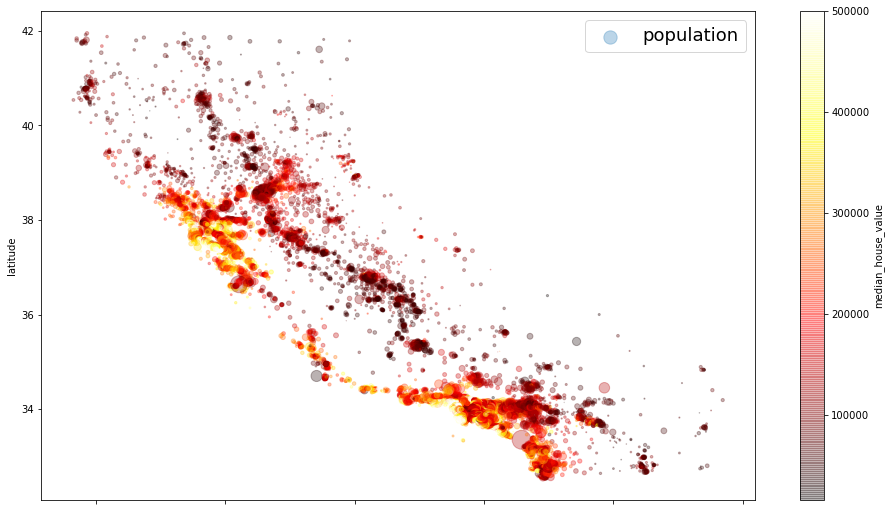

In [6]:
# california
df.plot(kind='scatter', x='longitude', y='latitude',
        alpha=0.3, s=df['population']/100, label='population',
        figsize=(16, 9), c='median_house_value',
        cmap=plt.get_cmap('hot'))
plt.legend(fontsize=18)

In [7]:
# feature correlations
corr = df.corr()
corr['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

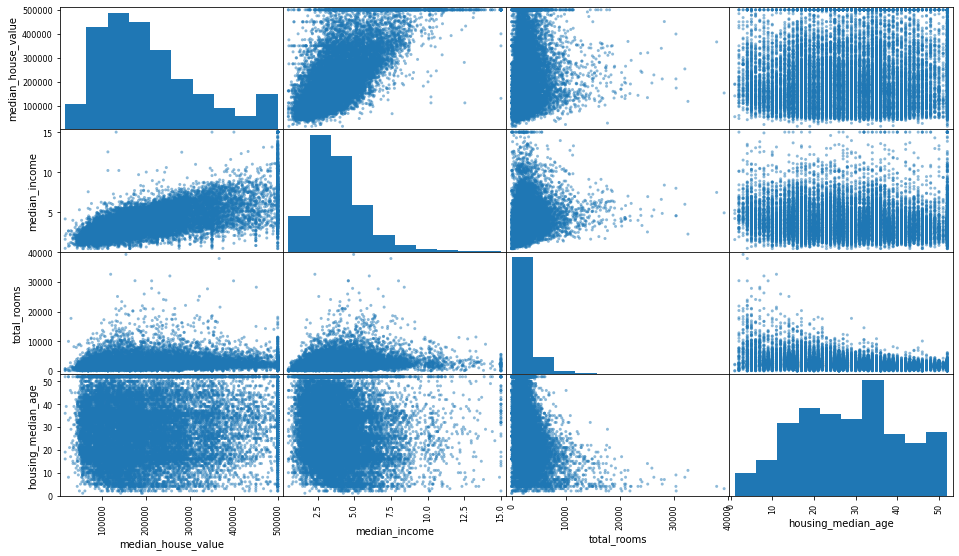

In [8]:
features = ['median_house_value', 'median_income',
            'total_rooms', 'housing_median_age']
scatter_matrix(df[features], figsize=(16, 9))

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

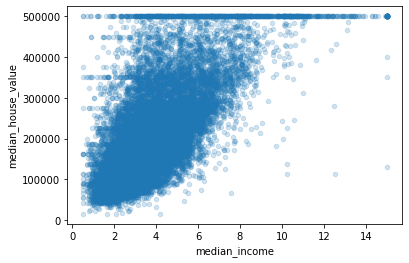

In [9]:
df.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.2)

In [10]:
# add new feature
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_household'] = df['population'] / df['households']

In [11]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467


In [12]:
# feature correlations
corr = df.corr()
corr['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

In [13]:
# select data
df_labels = df['median_house_value'].copy()
df = df.drop('median_house_value', axis=1)

In [14]:
# fill not-filled values
df['total_bedrooms'].fillna(df['total_bedrooms'].median(), inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20640 non-null  float64
 1   latitude                  20640 non-null  float64
 2   housing_median_age        20640 non-null  float64
 3   total_rooms               20640 non-null  float64
 4   total_bedrooms            20640 non-null  float64
 5   population                20640 non-null  float64
 6   households                20640 non-null  float64
 7   median_income             20640 non-null  float64
 8   ocean_proximity           20640 non-null  object 
 9   rooms_per_household       20640 non-null  float64
 10  bedrooms_per_room         20433 non-null  float64
 11  population_per_household  20640 non-null  float64
dtypes: float64(11), object(1)
memory usage: 1.9+ MB


In [16]:
# create lists of cat and num features
df_num = df.drop('ocean_proximity', axis=1)
num_att = list(df_num)
cat_att = ['ocean_proximity']

In [17]:
# DF transformator
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [18]:
# attribute adder
rooms_ix, bedrooms_ix, pop_ix, household_ix = 3, 4, 5, 6


class CombinedAttributeAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        pop_per_household = X[:, pop_ix] / X[:, household_ix]

        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household,
                         pop_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, pop_per_household]


attr_adder = CombinedAttributeAdder(add_bedrooms_per_room=False)
exctra_att = attr_adder.transform(df.values)

In [19]:
# pipeline
num_pipeline = Pipeline([('selector', DataFrameSelector(num_att)),
                 ('imputer', SimpleImputer(strategy='median')),
                 ('attribs_added', CombinedAttributeAdder()),
                 ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([('selector', DataFrameSelector(cat_att)),
                         ('cat_encoder', OneHotEncoder()),
    
])

In [20]:
# create full pipeline
complete_pipeline = FeatureUnion(
                    transformer_list=[('numerical', num_pipeline), 
                                      ('categirical', cat_pipeline)
                                     ])

In [21]:
df_prepared = complete_pipeline.fit_transform(df)
df_prepared

<20640x19 sparse matrix of type '<class 'numpy.float64'>'
	with 309600 stored elements in Compressed Sparse Row format>

In [22]:
# train a linear model
model = LinearRegression()
model.fit(df_prepared, df_labels)

LinearRegression()

In [23]:
# testing the linear model
data = df.iloc[:5]
labels = df.iloc[:5]
data_prepared = complete_pipeline.transform(data)
print(model.predict(data_prepared))

[406675.77102871 435079.91643101 375341.06158393 319533.86649838
 249103.81750022]


In [24]:
# rmse
predictions =  model.predict(df_prepared)
mse = mean_squared_error(df_labels, predictions)
rmse = np.sqrt(mse)
rmse

67874.97802140017

In [25]:
# train the random forest reg.
model = RandomForestRegressor()
model.fit(df_prepared, df_labels)

RandomForestRegressor()

In [26]:
# rmse
predictions =  model.predict(df_prepared)
mse = mean_squared_error(df_labels, predictions)
rmse = np.sqrt(mse)
rmse

18294.78404833635

In [27]:
# k-fold cross validation
scores = cross_val_score(model, df_prepared, df_labels, 
                        scoring='neg_mean_squared_error', cv=10)
tree_scores = np.sqrt(-scores)

In [29]:
# discplay a result
def display_scores(scores):
    print('Mean', scores.mean())
    print('std', scores.std())
    
display_scores(tree_scores)

Mean 63742.213545065824
std 15079.948332711692
